In [69]:
%matplotlib inline

import json

import pandas as pd

In [20]:
data_participants = "data/participants.json"
data_articles = "data/articles.json"

In [21]:
participants = json.load(open(data_participants,"r"))
articles = json.load(open(data_articles,"r"))

In [24]:
print len(participants["participants"])
print len(articles["articles"])

21329
696


In [108]:
for article in articles["articles"]:
  print article["article_id"]
  print article["article_link"]

61
http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-1-ouverture-des-donnees-publiques-1/article-1-elargissement-du-champ-de-diffusion-par-l-administration
62
http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-1-ouverture-des-donnees-publiques-1/article-2-principe-de-libre-reutilisation-des-donnees-pour-les-spic
63
http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-1-ouverture-des-donnees-publiques-1/article-3-dispositions-diverses
64
http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-2-service-public-de-la-donnee-1/article-4-creation-d-un-service-public-de-la-donnee
65
http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-3-donnees-d-interet-general/article-5-ouverture-des-donnees-par-defaut-

In [36]:
total_sources = 0
sources = set()
sourcesparticipantsmax = 0

for participant in participants["participants"]:
  # print(participant)
  
  p = participant[participant.keys()[0]]
  
  total_sources += p["sources_count"]
    
  for s in p["sources"]:
    sources.add(s["id"])

print(total_sources)

print len(sources)
#print participants["participants"]
print { p.keys()[0]: p[p.keys()[0]]["sources_count"] for p in participants["participants"] if p[p.keys()[0]]["sources_count"] > 0 }

415
326
{u'etiennelemaire': 5, u'stephanevial1': 1, u'clementd2': 1, u'lertsenem': 2, u'franckinfodocbib1': 3, u'aminemzerma': 1, u'paul': 1, u'inptoulouseinstitutnationalpolytechniquedetoulouse': 2, u'francegenerosites1': 1, u'francisandre': 1, u'bernardmartinez': 1, u'maltesenadine': 7, u'afnic': 1, u'dianerambaldini': 1, u'erwangeorget': 1, u'nicolasmorand': 1, u'victoriadominguezdelangel': 1, u'pierreobrecht': 4, u'robertodicosmo': 4, u'kappatau': 1, u'pierre1': 47, u'momb': 5, u'dr': 1, u'philippeleroux': 3, u'taneleo': 2, u'philippegambette': 2, u'martineotter': 2, u'pierreparadinas': 1, u'nicolasquenouille': 3, u'sbauin': 9, u'samsond': 16, u'nkgl': 9, u'djangicquel': 3, u'maximegierczaketmichaelvincent': 2, u'lionelbarbe': 1, u'jesserobert': 2, u'charlespicard': 1, u'stephanebortzmeyer': 1, u'isocfrance1': 1, u'francois': 4, u'alexanderdoria': 1, u'adamberrebi': 1, u'thibautlecorre': 2, u'sylvainribault': 1, u'badiibrahim': 1, u'mathieul': 2, u'delphineviguan': 1, u'jeannasjean

In [30]:
total_articlessources = 0
articlessources = set()
articlessourcesvotes = 0
articlessourcesarticles = set()

for article in articles["articles"]:
  #print article

  for s in article["sources"]:
    articlessources.add(s["link"])
    articlessourcesarticles.add(s["article_id"])

    articlessourcesvotes += int(s["votes_count"])

print len(sources)
print articlessourcesvotes
print len(articlessourcesarticles)

326
344
123


In [76]:
def get_nbvotes(user_id):
  result = 0
  
  p = [ p[p.keys()[0]] for p in participants["participants"] if p.keys()[0] == user_id][0]
  
  # print p
  for s in p["sources"]:
    # print s
    result += s["votes"]
  
  return result

def get_source_argument_averagelength(user_id):
  result = 0
  
  p = [ p[p.keys()[0]] for p in participants["participants"] if p.keys()[0] == user_id][0]
  
  # print p
  for s in p["sources"]:
    # print s
    result += len(s["body"])

  # print p
  # print len(p["sources"])
  # print result
  result = float(result) / float(p["sources_count"])
  
  return result

data = [ { "user_id": p.keys()[0], "sources count": p[p.keys()[0]]["sources_count"], "sources votes": get_nbvotes(p.keys()[0]), "sources lengthaverage": get_source_argument_averagelength(p.keys()[0]) } for p in participants["participants"] if p[p.keys()[0]]["sources_count"] > 0 ]

df_participants_sources = pd.DataFrame(data)

df_participants_sources["sources votes/counts"] = df_participants_sources["sources votes"] / df_participants_sources["sources count"]

df_participants_sources = df_participants_sources.set_index("user_id")

df_participants_sources = df_participants_sources.sort(["sources votes/counts"], ascending=[0])

df_participants_sources

sources count  \
user_id                                                                       
francoisgeze                                                              2   
syndicatnationaldeledition                                                2   
julienlege                                                                2   
oliviermorin1                                                             1   
inradistodilehologne                                                      1   
nicolasquenouille                                                         3   
godefroybeauvallet                                                        1   
mti131                                                                    1   
bernardfallery                                                            1   
dalbinsylvie                                                              1   
francegenerosites1                                                        1   
pierrektm                                                                 1   
obiwankenobi                                                              2   
maximegierczaketmichaelvincent                                            2   
yadlajoie                                                                 2   
robertodicosmo                                                            4   
philippegambette                                                          2   
mathieustumpfguntz                                                        2   
fauvel                                                                    1   
jeannasjeanyves                                                           1   
nkgl                                                                      9   
laurentfaucillon                                                          1   
afils                                                                     1   
bernardmartinez                                                           1   
farapejfederationdesassociationsreflexionactionprisonjustice              3   
stephanevial1                                                             1   
yvesmartin                                                                3   
jesserobert                                                               2   
aminemzerma                                                               1   
pierreparadinas                                                           1   
...                                                                     ...   
olivierserordroin                                                         4   
kenoudi                                                                   1   
tommyguyennot                                                             1   
delphineviguan                                                            1   
dianerambaldini                                                           1   
levyaurelien                                                              1   
victoriadominguezdelangel                                                 1   
kappatau                                                                  1   
paul                                                                      1   
alainmille                                                                1   
pierreguyomarpro                                                          1   
constancedequatrebarbes                                                   1   
lucasgruber                                                               1   
edhconsulting                                                             1   
votonslaloi                                                               4   
nicolasochoa                                                              1   
rverhalle                                                                 4   
erwangeorget                                                              1   
nicoprat                         

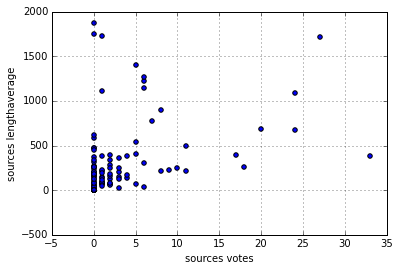

In [77]:
df_participants_sources.plot(kind="scatter", y= "sources lengthaverage", x= "sources votes")

In [86]:
data = []

for p in articles["articles"]:
  for s in p["sources"]:
    data.append({ "link": s["link"], "article": s["article_id"], "votes": int(s["votes_count"]), "body_length": len(s["body"]) })
    
df_sources = pd.DataFrame(data)

df_sources = df_sources.sort(["votes"], ascending=[0])


df_sources

article  body_length                                               link  \
23        69         2342  http://www.lemonde.fr/idees/article/2015/10/07...   
36        69          642  http://www.cnrs.fr/dist/z-outils/documents/Mot...   
27        69         1091  http://www.openaccess-shs.info/lopen-access-et...   
173      152         1100  http://www.april.org/analyse-detaillee-circula...   
25        69          974  http://dx.doi.org/10.2139/ssrn.2243264#source-290   
26        69         1202  http://www.ledevoir.com/societe/education/4506...   
31        69          225  http://erc.europa.eu/sites/default/files/docum...   
28        69          898  http://openaccess.inist.fr/?Science-Europe-tra...   
33        69          285  https://www.law.cornell.edu/uscode/text/17/105...   
174      152          276  http://www.lagazettedescommunes.com/377971/la-...   
97        93         2161             https://youtu.be/jktUU5q1Q8E#source-27   
35        69          976  http://contribuez.cnnumerique.fr/sites/default...   
37        69         1402  http://www.ipp.eu/publication/n19-delai-libre-...   
110      103           70       http://www.ordinateurs-de-vote.org/#source-1   
38        69         1071  https://ec.europa.eu/research/science-society/...   
212      265         7209  http://www.legifrance.gouv.fr/affichCodeArticl...   
211      265          166  https://fr.wikipedia.org/wiki/Libert%C3%A9_de_...   
20        69          133  http://www.inra.cgt.fr/actions/revendications/...   
34        69          587  http://www.dicosmo.org/FSP/FreeAccessToScience...   
139      115          284  http://www.lapresse.ca/le-soleil/actualites/vu...   
102       99         2021  http://www.senat.fr/fileadmin/Fichiers/Images/...   
29        69          152  http://www.ledevoir.com/societe/education/4506...   
71        87          201  http://www.associations.gouv.fr/IMG/pdf/hcva-r...   
186      177           29  https://aful.org/communiques/tres-belle-victoi...   
185      177           46  https://cuifavocats.com/la-justice-se-prononce...   
101       99          268  http://www.lemonde.fr/idees/article/2015/09/25...   
19        69          119  http://www.leru.org/files/general/LERU%20State...   
160      146         1152  http://www.estrepublicain.fr/edition-de-vesoul...   
17        68          160  http://romainelubrique.org/domaine-public-nume...   
261      369          144  http://erc.europa.eu/projects-and-results/erc-...   
..       ...          ...                                                ...   
215      272          858  http://fr.wikipedia.org/wiki/Ergonomie_informa...   
216      272          522  http://fr.wikipedia.org/wiki/Accessibilit%C3%A...   
217      272          275  http://fr.wikipedia.org/wiki/Accessibilit%C3%A...   
179      162           52       http://classes.bnf.fr/dossiers.php#source-21   
178      162           75  http://www.defenseurdesdroits.fr/fr/publicatio...   
177      162           72                http://www.sesamath.net/#source-216   
152      134          159  http://www.numerama.com/magazine/32646-le-code...   
111      104          236  http://www.liberation.fr/debats/2015/10/09/dom...   
113      106          156  http://levine.sscnet.ucla.edu/general/intellec...   
127      110           59  http://www.midilibre.fr/2015/01/06/marseille-u...   
129      110           11  http://www.clubic.com/mag/trendy/actualite-760...   
131      114          601  http://www.legifrance.gouv.fr/affichTexte.do?c...   
132      114         1028  https://www.service-public.fr/particuliers/act...   
133      115          160  http://www.ginjfo.com/actualites/politique-et-...   
142      120          340  http://lunatopia.fr/blog/les-gamins-ne-savent-...   
150      132          200  http://www.gnu.org/philosophy/government-free-...   
151      134          152  https://github.com/legifrance/La-Constitution#...   
153      135           75  http://www.legifrance.gouv.fr/affichTexte.do?c...   
171  

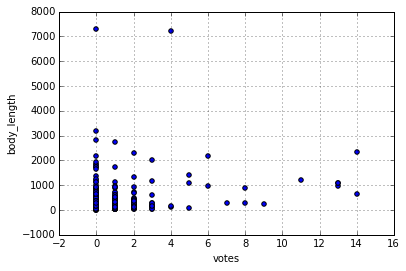

In [82]:
df_sources.plot(kind="scatter", y= "body_length", x= "votes")

In [109]:
data = []

for article in articles["articles"]:
  total_sources_votes = 0
  
  for s in article["sources"]:
    total_sources_votes += int(s["votes_count"])
  
  data.append({ "article": article["article_id"],"sources count": article["sources_count"], "sources votes": total_sources_votes })

data = [ d for d in data if d['sources count'] > 0]
  
df_articles = pd.DataFrame(data)

df_articles["count/votes"] = df_articles["sources votes"] / (df_articles["sources count"])

df_articles = df_articles.sort(["sources count"], ascending=[0])

df_articles

article  sources count  sources votes  count/votes
6         69             22            130     5.909091
32       109             10             19     1.900000
0         61              8              9     1.125000
36       115              8             11     1.375000
29       103              8              9     1.125000
107      482              7              0     0.000000
21        88              7              4     0.571429
20        87              6              3     0.500000
105      450              6              1     0.166667
17        84              6              0     0.000000
33       110              6              8     1.333333
116      600              6              0     0.000000
19        86              5              4     0.800000
52       152              5             22     4.400000
83       289              5              3     0.600000
118      612              5              0     0.000000
96       369              5             11     2.200000
23        90              5              0     0.000000
22        89              5              0     0.000000
18        85              5              1     0.200000
79       276              5              6     1.200000
111      519              4              3     0.750000
76       272              4              1     0.250000
77       274              4              0     0.000000
78       275              4              0     0.000000
69       243              4              0     0.000000
48       146              3              5     1.666667
73       265              3              9     3.000000
40       129              3              3     1.000000
37       120              3              3     1.000000
..       ...            ...            ...          ...
3         66              1              0     0.000000
89       323              1              0     0.000000
94       367              1              0     0.000000
92       333              1              0     0.000000
57       172              1              0     0.000000
58       176              1              0     0.000000
47       144              1              0     0.000000
62       182              1              0     0.000000
46       141              1              1     1.000000
45       138              1              0     0.000000
65       213              1              1     1.000000
66       222              1              0     0.000000
67       236              1              0     0.000000
68       241              1              0     0.000000
70       244              1              0     0.000000
72       254              1              0     0.000000
74       266              1              1     1.000000
75       271              1              0     0.000000
41       132              1              0     0.000000
39       128              1              1     1.000000
80       277              1              1     1.000000
34       113              1              2     2.000000
82       285              1              0     0.000000
31       106              1              0     0.000000
86       301              1              0     0.000000
87       306              1              2     2.000000
88       315              1              0     0.000000
56       170              1              1     1.000000
26        94              1              0     0.000000
122      708              1              0     0.000000

[123 rows x 4 columns]

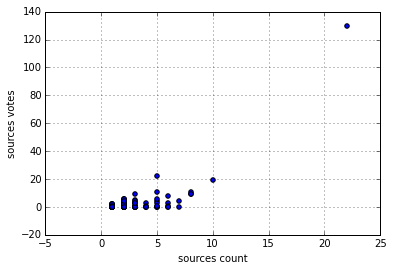

In [101]:
df_articles.plot(kind="scatter", x="sources count", y="sources votes")